<a href="https://colab.research.google.com/github/prince545/exploratory-data-analysis/blob/main/CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                # For numerical operations and working with arrays
import pandas as pd              # For data manipulation and analysis using dataframes
import seaborn as sns            # For statistical data visualization (built on top of matplotlib)
import matplotlib.ticker as mtick # For controlling axis tick formatting in matplotlib plots
import matplotlib.pyplot as plt  # For creating plots and visualizations


In [2]:
df = pd.read_csv('/content/CustomerChurn.csv')


In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# prompt: df. shape

df.shape

(7043, 21)

In [5]:
# Check the de
df .describe ()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df['Churn'].value_counts() / len(df) * 100


,count
Churn,
No,73.463013
Yes,26.536987


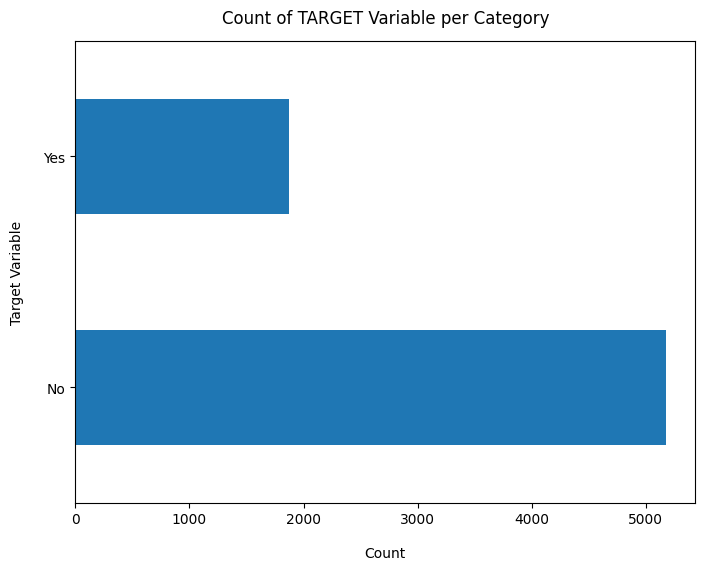

In [7]:
import matplotlib.pyplot as plt

# Plotting Churn variable counts as a horizontal bar chart
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))

# Adding labels and title
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per Category", y=1.02)

# Show the plot
plt.show()


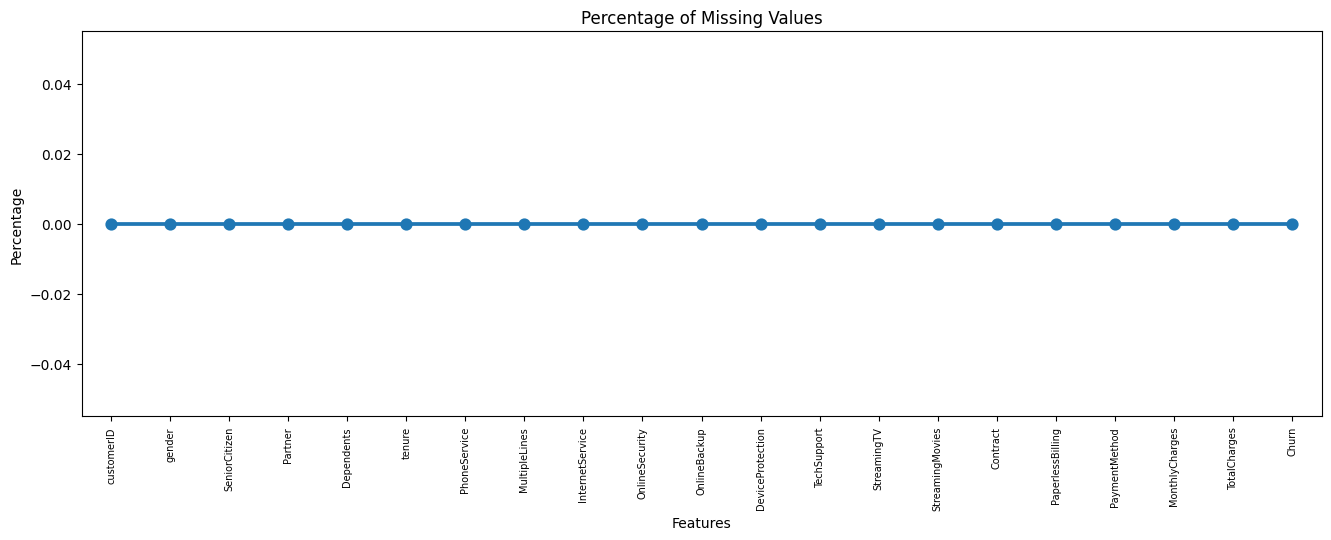

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate missing values as percentage
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['Feature', 'MissingPercentage']

# Plot
plt.figure(figsize=(16, 5))
ax = sns.pointplot(data=missing, x='Feature', y='MissingPercentage')
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Features")
plt.show()


In [9]:
new_df = df.copy()
new_df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'], errors='coerce')
new_df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
new_df.loc[new_df['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
#Removing missing values
new_df. dropna (how = 'any', inplace = True) I
#telco_data. fillna(e)

SyntaxError: invalid syntax (ipython-input-12-563785473.py, line 2)

In [15]:

new_df.dropna(how = 'any', inplace = True)


In [16]:
print(new_df['tenure'].max())  # 72


72


In [17]:
# Create labels for 12-month tenure groups
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
print(labels)
# Output: ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

# Group the tenure into 12-month bins
new_df['tenure_group'] = pd.cut(new_df.tenure, bins=range(1, 80, 12), right=False, labels=labels)


['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [18]:
new_df['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


In [19]:
new_df.drop(['customerID', 'tenure'], axis=1, inplace=True)
new_df.drop(['customerID', 'tenure'], axis=1, inplace=True)


KeyError: "['customerID', 'tenure'] not found in axis"

In [20]:
new_df.drop(['customerID', 'tenure'], axis=1, inplace=True)


KeyError: "['customerID', 'tenure'] not found in axis"

In [21]:


new_df.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
new_df.head()

KeyError: "['customerID', 'tenure'] not found in axis"

In [22]:
# Drop columns 'customerID' and 'tenure'
new_df.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)

# Display the top 5 rows
new_df.head()


KeyError: "['customerID', 'tenure'] not found in axis"

In [23]:
print(new_df.columns.tolist())


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group']
